In [1]:
import os 
import getpass

In [3]:
pip install -q -U google-generativeai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install -U langchain-deepseek-official

Note: you may need to restart the kernel to use updated packages.Collecting langchain-deepseek-official
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29




[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install langchain_community tiktoken langchain-google-genai langchainhub chromadb langchain


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install -U langgraph langchain-community langchain-anthropic tavily-python pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: langgraph in c:\users\swaroop\appdata\local\programs\python\python312\lib\site-packages (0.2.63)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install -U openai

  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install langchain-anthropic

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

In [4]:
_set_env("TAVILY_API_KEY")
_set_env("ANTHROPIC_API_KEY")

In [5]:
import os
import shutil
import sqlite3
from langchain_anthropic import ChatAnthropic
import pandas as pd
import requests

In [6]:
db_url = "https://storage.googleapis.com/benchmarks-artifacts/travel-db/travel2.sqlite"
local_file = "travel2.sqlite"
# The backup lets us restart for each tutorial section
backup_file = "travel2.backup.sqlite"
overwrite = True

if overwrite or not os.path.exists(local_file):
    response = requests.get(db_url)
    print("Downloading database...")
    response.raise_for_status()
    
    with open(local_file,"wb") as f:
        f.write(response.content)
    print(f"Database saved to {local_file}")
    shutil.copy(local_file,backup_file)
    print(f"Backup created at {backup_file}")

Database saved to travel2.sqlite
Backup created at travel2.backup.sqlite


In [7]:
def display_database(file = local_file):
    # dispaly the data
    # Establish connection to the SQLite database
    conn = sqlite3.connect(file)
    
    # Get all table names from the SQLite database
    tables = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", conn
    ).name.tolist()
    
    # Dictionary to store DataFrames for each table
    tdf = {}
    
    # Loop through each table and load it into a DataFrame
    
    print(tables)
    for t in tables:
        tdf[t] = pd.read_sql(f"SELECT * FROM {t}", conn)
        print(f"Data from table {t}:")
        print(tdf[t])

    # Close the connection
    conn.close()


In [8]:
def update_dates(file):
    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    tables = pd.read_sql("Select * from sqlite_master WHERE type='table';",conn).name.tolist()
    td = {}
    for t in tables:
        td[t] = pd.read_sql(f"Select * from {t}",conn)
    example_time = pd.to_datetime(td["flights"]["actual_departure"]).replace("\\N",pd.NaT).max()
    current_time = pd.to_datetime("now").tz_localize(example_time.tz)
    time_difference = current_time - example_time
    
    td["bookings"]["book_date"] = (
        pd.to_datetime(td["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
        + time_difference
    )
    datetime_columns = [
        "scheduled_departure",
        "scheduled_arrival",
        "actual_departure",
        "actual_arrival",
    ]
    for column in datetime_columns:
        td["flights"][column] =  (pd.to_datetime(td["flights"][column].replace("\\N", pd.NaT),utc=True) + time_difference)
    for table_name, df in td.items():
        df.to_sql(table_name, conn, if_exists="replace", index=False)
    del df
    del td
    conn.commit()
    conn.close()

    return file

file = update_dates(local_file)

In [9]:
file

'travel2.sqlite'

In [10]:
display_database(file)

['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets', 'car_rentals', 'hotels', 'trip_recommendations']
Data from table aircrafts_data:
  aircraft_code                model  range
0           773       Boeing 777-300  11100
1           763       Boeing 767-300   7900
2           SU9  Sukhoi Superjet-100   3000
3           320      Airbus A320-200   5700
4           321      Airbus A321-200   5600
5           319      Airbus A319-100   6700
6           733       Boeing 737-300   4200
7           CN1   Cessna 208 Caravan   1200
8           CR2   Bombardier CRJ-200   2700
Data from table airports_data:
    airport_code                                      airport_name  \
0            ATL  Hartsfield-Jackson Atlanta International Airport   
1            PEK             Beijing Capital International Airport   
2            DXB                       Dubai International Airport   
3            LAX                 Los Angeles Interna

In [11]:
display_database()

['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets', 'car_rentals', 'hotels', 'trip_recommendations']
Data from table aircrafts_data:
  aircraft_code                model  range
0           773       Boeing 777-300  11100
1           763       Boeing 767-300   7900
2           SU9  Sukhoi Superjet-100   3000
3           320      Airbus A320-200   5700
4           321      Airbus A321-200   5600
5           319      Airbus A319-100   6700
6           733       Boeing 737-300   4200
7           CN1   Cessna 208 Caravan   1200
8           CR2   Bombardier CRJ-200   2700
Data from table airports_data:
    airport_code                                      airport_name  \
0            ATL  Hartsfield-Jackson Atlanta International Airport   
1            PEK             Beijing Capital International Airport   
2            DXB                       Dubai International Airport   
3            LAX                 Los Angeles Interna

In [12]:
import re

import numpy as np
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.tools import tool
import openai

# response = requests.get(
#     "https://storage.googleapis.com/benchmarks-artifacts/travel-db/swiss_faq.md"
# )
# response.raise_for_status()
# faq_text = response.text


# docs = [{"page_content": txt} for txt in re.split(r"(?=\n##)", faq_text)]


# class VectorStoreRetriever:
#     def __init__(self, docs: list, vectors: list, oai_client):
#         self._arr = np.array(vectors)
#         self._docs = docs
#         self._client = oai_client

#     @classmethod
#     def from_docs(cls, docs, oai_client):
#         embeddings = oai_client.embeddings.create(
#             model="text-embedding-3-small", input=[doc["page_content"] for doc in docs]
#         )
#         vectors = [emb.embedding for emb in embeddings.data]
#         return cls(docs, vectors, oai_client)

#     def query(self, query: str, k: int = 5) -> list[dict]:
#         embed = self._client.embeddings.create(
#             model="text-embedding-3-small", input=[query]
#         )
#         # "@" is just a matrix multiplication in python
#         scores = np.array(embed.data[0].embedding) @ self._arr.T
#         top_k_idx = np.argpartition(scores, -k)[-k:]
#         top_k_idx_sorted = top_k_idx[np.argsort(-scores[top_k_idx])]
#         return [
#             {**self._docs[idx], "similarity": scores[idx]} for idx in top_k_idx_sorted
#         ]


# retriever = VectorStoreRetriever.from_docs(docs, openai.Client())



# @tool
# def lookup_policy(query: str) -> str:
#     """Consult the company policies to check whether certain options are permitted.
#     Use this before making any flight changes performing other 'write' events."""
#     docs = retriever.query(query, k=2)
#     return "\n\n".join([doc["page_content"] for doc in docs])

C:\Users\swaroop\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# import sqlite3
# from datetime import date, datetime
# from typing import Optional

# import pytz
# from langchain_core.runnables import RunnableConfig

# @tool
# def fecth_user_flight_information(config : RunnableConfig):
#     """Fetch all tickets for the user along with corresponding flight information and seat assignments.

#     Returns:
#         A list of dictionaries where each dictionary contains the ticket details,
#         associated flight details, and the seat assignments for each ticket belonging to the user.
#     """
#     configuration = config.get("configurable", {})    
#     pass_id = configuration.get("passenger_id", None)
#     if not pass_id:
#         raise ValueError("No passenger id Founded")

#     conn = sqlite3.connect(file)
#     cursor = conn.cursor()

#     query = """
#     SELECT 
#         t.ticket_no, t.book_ref,
#         f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
#         bp.seat_no, tf.fare_conditions
#     FROM 
#         tickets t
#         JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
#         JOIN flights f ON tf.flight_id = f.flight_id
#         JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
#     WHERE 
#         t.passenger_id = ?
#     """
#     cursor.execute(query,(pass_id,))
#     rows = cursor.fetchall()
#     column_names = [column[0] for column in cursor.description]
#     results = [dict(zip(column_names,row)) for row in rows]

#     cursor.close()
#     conn.close()

#     return results

# @tool
# def search_flights(
#     departure_airport: str,
#     arrival_airport: str,
#     start_time: str,
#     end_time: str,
#     limit: int
# ):
#     """Search for flights based on departure airport, arrival airport, and departure time range.
    
#     Args:
#         departure_airport (str): The departure airport code
#         arrival_airport (str): The arrival airport code
#         start_time (str): Start of the time range in ISO format
#         end_time (str): End of the time range in ISO format
#         limit (int): Maximum number of results to return
#     """
#     conn = sqlite3.connect(db)
#     cursor = conn.cursor()
    
#     query = '''SELECT * FROM flights WHERE 1 = 1'''
#     params = []
    
#     if departure_airport:
#         query += ''' AND departure_airport = ?'''
#         params.append(departure_airport)
        
#     if arrival_airport:  # Added missing condition
#         query += ''' AND arrival_airport = ?'''
#         params.append(arrival_airport)
        
#     if start_time:
#         query += ''' AND scheduled_departure >= ?'''  # Fixed column name
#         params.append(start_time)
        
#     if end_time:
#         query += ''' AND scheduled_departure <= ?'''  # Fixed column name
#         params.append(end_time)
        
#     query += ' LIMIT ?'
#     params.append(limit)
    
#     cursor.execute(query, params)  # Fixed parameter passing
#     rows = cursor.fetchall()
#     column_names = [column[0] for column in cursor.description]
#     results = [dict(zip(column_names, row)) for row in rows]
#     cursor.close()
#     conn.close()
#     return results

In [22]:
import sqlite3
from datetime import date, datetime
from typing import Optional

import pytz
from langchain_core.runnables import RunnableConfig


@tool
def fetch_user_flight_information(config: RunnableConfig) -> list[dict]:
    """Fetch all tickets for the user along with corresponding flight information and seat assignments.

    Returns:
        A list of dictionaries where each dictionary contains the ticket details,
        associated flight details, and the seat assignments for each ticket belonging to the user.
    """
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    query = """
    SELECT 
        t.ticket_no, t.book_ref,
        f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
        bp.seat_no, tf.fare_conditions
    FROM 
        tickets t
        JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
        JOIN flights f ON tf.flight_id = f.flight_id
        JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
    WHERE 
        t.passenger_id = ?
    """
    cursor.execute(query, (passenger_id,))
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def search_flights(
    departure_airport: Optional[str] = None,
    arrival_airport: Optional[str] = None,
    start_time: Optional[date | datetime] = None,
    end_time: Optional[date | datetime] = None,
    limit: int = 20,
) -> list[dict]:
    """Search for flights based on departure airport, arrival airport, and departure time range."""
    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    query = "SELECT * FROM flights WHERE 1 = 1"
    params = []

    if departure_airport:
        query += " AND departure_airport = ?"
        params.append(departure_airport)

    if arrival_airport:
        query += " AND arrival_airport = ?"
        params.append(arrival_airport)

    if start_time:
        query += " AND scheduled_departure >= ?"
        params.append(start_time)

    if end_time:
        query += " AND scheduled_departure <= ?"
        params.append(end_time)
    query += " LIMIT ?"
    params.append(limit)
    cursor.execute(query, params)
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def update_ticket_to_new_flight(
    ticket_no: str, new_flight_id: int, *, config: RunnableConfig
) -> str:
    """Update the user's ticket to a new valid flight."""
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT departure_airport, arrival_airport, scheduled_departure FROM flights WHERE flight_id = ?",
        (new_flight_id,),
    )
    new_flight = cursor.fetchone()
    if not new_flight:
        cursor.close()
        conn.close()
        return "Invalid new flight ID provided."
    column_names = [column[0] for column in cursor.description]
    new_flight_dict = dict(zip(column_names, new_flight))
    timezone = pytz.timezone("Etc/GMT-3")
    current_time = datetime.now(tz=timezone)
    departure_time = datetime.strptime(
        new_flight_dict["scheduled_departure"], "%Y-%m-%d %H:%M:%S.%f%z"
    )
    time_until = (departure_time - current_time).total_seconds()
    if time_until < (3 * 3600):
        return f"Not permitted to reschedule to a flight that is less than 3 hours from the current time. Selected flight is at {departure_time}."

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    current_flight = cursor.fetchone()
    if not current_flight:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT * FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    # In a real application, you'd likely add additional checks here to enforce business logic,
    # like "does the new departure airport match the current ticket", etc.
    # While it's best to try to be *proactive* in 'type-hinting' policies to the LLM
    # it's inevitably going to get things wrong, so you **also** need to ensure your
    # API enforces valid behavior
    cursor.execute(
        "UPDATE ticket_flights SET flight_id = ? WHERE ticket_no = ?",
        (new_flight_id, ticket_no),
    )
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully updated to new flight."


@tool
def cancel_ticket(ticket_no: str, *, config: RunnableConfig) -> str:
    """Cancel the user's ticket and remove it from the database."""
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    existing_ticket = cursor.fetchone()
    if not existing_ticket:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT ticket_no FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    cursor.execute("DELETE FROM ticket_flights WHERE ticket_no = ?", (ticket_no,))
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully cancelled."

In [23]:
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda

from langgraph.prebuilt import ToolNode


def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print("Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)

In [24]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig

In [25]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info : str

In [26]:
class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            configuration = config.get("configurable", {})
            passenger_id = configuration.get("passenger_id", None)
            state = {**state, "user_info": passenger_id}
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}

In [27]:
# llm = ChatGoogleGenerativeAI(
#     model="gemini-2.0-flash-exp",
#     temperature=0,
#     max_tokens=None,
#     timeout=None,
#     max_retries=2,
#     # other params...
# )

In [28]:
# from langchain_deepseek import ChatDeepSeek

# llm = ChatDeepSeek(
#     model="deepseek-chat",
#     temperature=0,
#     max_tokens=None,
#     timeout=None,
#     max_retries=2,
#     # api_key="...",
#     # other params...
# )

In [29]:
llm = ChatAnthropic(model="claude-3-5-sonnet-20241022", temperature=1)

In [30]:
msg = llm.invoke("what is your name")

In [31]:
msg.content

"I'm Claude, an AI created by Anthropic. While I aim to be direct and honest about what I am, I aim to be helpful while engaging with humans."

In [32]:
primary_assistant_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful customer support assistant for Swiss Airlines. "
            " Use the provided tools to search for flights, company policies, and other information to assist the user's queries. "
            " When searching, be persistent. Expand your query bounds if the first search returns no results. "
            " If a search comes up empty, expand your search before giving up."
            "\n\nCurrent user:\n<User>\n{user_info}\n</User>"
            "\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now)

In [34]:
part_1_tools = [
    TavilySearchResults(max_results=1),
    fetch_user_flight_information,
    search_flights,
]

In [35]:
part_1_assistant_runnable = primary_assistant_prompt | llm.bind_tools(part_1_tools)

In [36]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


def user_info(state: State):
    return {"user_info": fetch_user_flight_information.invoke({})}

# NEW: The fetch_user_info node runs first, meaning our assistant can see the user's flight information without
# having to take an action
builder.add_node("fetch_user_info", user_info)
builder.add_edge(START, "fetch_user_info")
# Define nodes: these do the work
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("tools", create_tool_node_with_fallback(part_1_tools))
# Define edges: these determine how the control flow moves
builder.add_edge("fetch_user_info", "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

# The checkpointer lets the graph persist its state
# this is a complete memory for the entire graph.
memory = MemorySaver()
part_1_graph = builder.compile(checkpointer=memory,
                              # NEW: The graph will always halt before executing the "tools" node.
    # The user can approve or reject (or even alter the request) before
    # the assistant continues
    interrupt_before=["tools"],)

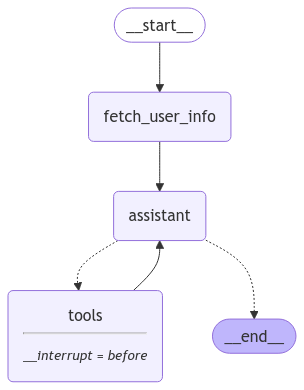

In [37]:
from IPython.display import Image, display

try:
    display(Image(part_1_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [38]:
#Example conversation


import shutil
import uuid

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "Hi there, what time is my flight?",
    "Am i allowed to update my flight to something sooner? I want to leave later today.",
]

# Update with the backup file so we can restart from the original place in each section
file = update_dates(file)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        "passenger_id":"3442 587242",  # Remove space
        "thread_id": thread_id,
    }
}



In [39]:
print(config)

{'configurable': {'passenger_id': '3442 587242', 'thread_id': '359a7ba8-38b4-441b-97d4-fcac8fa1a937'}}


In [41]:
_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in tutorial_questions:
    events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)
    snapshot = part_1_graph.get_state(config)
    while snapshot.next:
        # We have an interrupt! The agent is trying to use a tool, and the user can approve or deny it
        # Note: This code is all outside of your graph. Typically, you would stream the output to a UI.
        # Then, you would have the frontend trigger a new run via an API call when the user has provided input.
        try:
            user_input = input(
                "Do you approve of the above actions? Type 'y' to continue;"
                " otherwise, explain your requested changed.\n\n"
            )
        except:
            user_input = "y"
        if user_input.strip() == "y":
            # Just continue
            result = part_1_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            result = part_2_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_1_graph.get_state(config)

================================ Human Message =================================

Hi there, what time is my flight?
================================== Ai Message ==================================

[{'text': 'Let me look up your flight information using the ticket reference number you provided.', 'type': 'text'}, {'id': 'toolu_01HwsHSTiCmTwmzt8YEK3gPv', 'input': {}, 'name': 'fetch_user_flight_information', 'type': 'tool_use'}]
Tool Calls:
  fetch_user_flight_information (toolu_01HwsHSTiCmTwmzt8YEK3gPv)
 Call ID: toolu_01HwsHSTiCmTwmzt8YEK3gPv
  Args:


Do you approve of the above actions? Type 'y' to continue; otherwise, explain your requested changed.

 y


================================ Human Message =================================

Am i allowed to update my flight to something sooner? I want to leave later today.
================================== Ai Message ==================================

[{'text': 'Let me help you check for earlier flights today from Paris CDG to Basel. ', 'type': 'text'}, {'id': 'toolu_01BKCCzZ2rQHQ7eZ443Fynyb', 'input': {'query': 'Swiss Airlines same day flight change policy'}, 'name': 'tavily_search_results_json', 'type': 'tool_use'}]
Tool Calls:
  tavily_search_results_json (toolu_01BKCCzZ2rQHQ7eZ443Fynyb)
 Call ID: toolu_01BKCCzZ2rQHQ7eZ443Fynyb
  Args:
    query: Swiss Airlines same day flight change policy


Do you approve of the above actions? Type 'y' to continue; otherwise, explain your requested changed.

 y
Do you approve of the above actions? Type 'y' to continue; otherwise, explain your requested changed.

 y


In [79]:
# _printed = set()
# for question in tutorial_questions:
#     events = part_1_graph.stream(
#         {"messages": ("user", question)}, config, stream_mode="values"
#     )
#     for event in events:
#         _print_event(event, _printed)

================================ Human Message =================================

Hi there, what time is my flight?
================================== Ai Message ==================================

[{'text': 'Let me look up your flight information.', 'type': 'text'}, {'id': 'toolu_017zW3FYJJdPT9YS2EpJFapX', 'input': {}, 'name': 'fecth_user_flight_information', 'type': 'tool_use'}]
Tool Calls:
  fecth_user_flight_information (toolu_017zW3FYJJdPT9YS2EpJFapX)
 Call ID: toolu_017zW3FYJJdPT9YS2EpJFapX
  Args:
================================= Tool Message =================================
Name: fecth_user_flight_information

[{"ticket_no": "7240005432906569", "book_ref": "C46E9F", "flight_id": 19250, "flight_no": "LX0112", "departure_airport": "CDG", "arrival_airport": "BSL", "scheduled_departure": "2025-02-06 00:40:26.727155+00:00", "scheduled_arrival": "2025-02-06 02:10:26.727155+00:00", "seat_no": "18E", "fare_conditions": "Economy"}]
================================== Ai Message =======